# Missing values + outliers - Detection and Treatment + MORE

# Dataset - adult.csv ( https://drive.google.com/file/d/1GtwjrZpP6jiZWXyYShiMHBamUstFgaEF/view?usp=sharing )

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [2]:
# Loading the data
data = pd.read_csv("adult.csv")

In [3]:
# Number of Rows and Columns 
data.shape

(48842, 15)

In [4]:
# First Five Records
data.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
# Number of Unique Levels
data.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [7]:
# Data Types
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [8]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Visualization

<AxesSubplot:xlabel='gender', ylabel='count'>

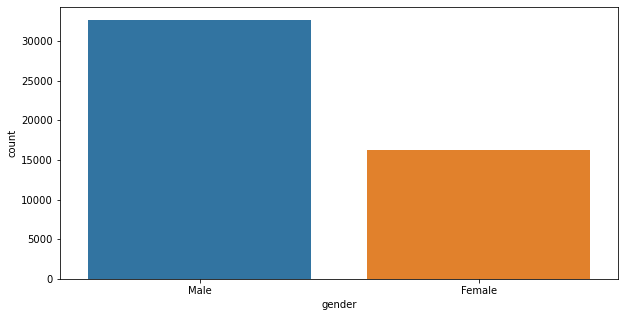

In [9]:
# Gender
plt.figure(figsize=(10,5))
sns.countplot(data['gender'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73]),
 [Text(0, 0, '17'),
  Text(1, 0, '18'),
  Text(2, 0, '19'),
  Text(3, 0, '20'),
  Text(4, 0, '21'),
  Text(5, 0, '22'),
  Text(6, 0, '23'),
  Text(7, 0, '24'),
  Text(8, 0, '25'),
  Text(9, 0, '26'),
  Text(10, 0, '27'),
  Text(11, 0, '28'),
  Text(12, 0, '29'),
  Text(13, 0, '30'),
  Text(14, 0, '31'),
  Text(15, 0, '32'),
  Text(16, 0, '33'),
  Text(17, 0, '34'),
  Text(18, 0, '35'),
  Text(19, 0, '36'),
  Text(20, 0, '37'),
  Text(21, 0, '38'),
  Text(22, 0, '39'),
  Text(23, 0, '40'),
  Text(24, 0, '41'),
  Text(25, 0, '42'),
  Text(26, 0, '43'),
  Text(27, 0, '44'),
  Text(28, 0, '45'),
  Text(29, 0, '46'),
  Text(30, 0, '47'),
  Text(31, 0, '48'),


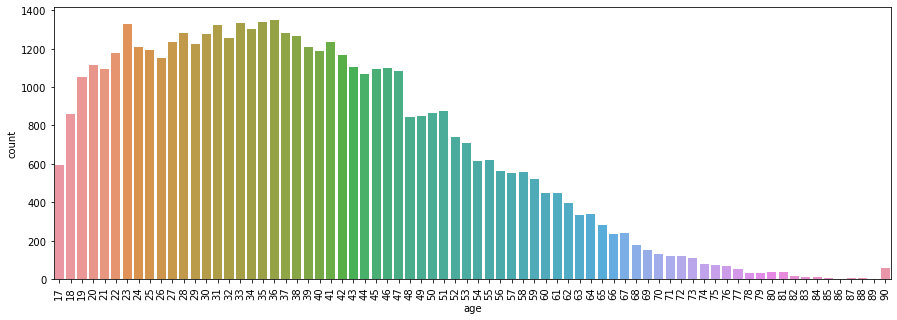

In [10]:
# Age
plt.figure(figsize=(15,5)),
sns.countplot(data['age']),
plt.xticks(rotation=90)

In [11]:
data["workclass"].replace("?","others",inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Private'),
  Text(1, 0, 'Local-gov'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Self-emp-not-inc'),
  Text(4, 0, 'Federal-gov'),
  Text(5, 0, 'State-gov'),
  Text(6, 0, 'Self-emp-inc'),
  Text(7, 0, 'Without-pay'),
  Text(8, 0, 'Never-worked')])

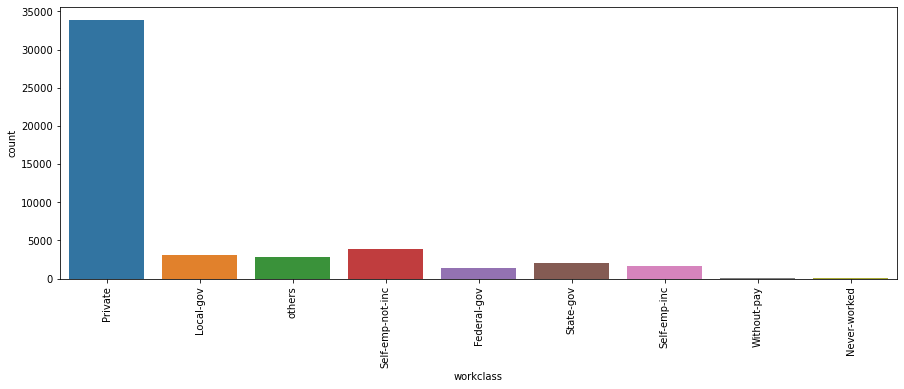

In [12]:
# Workclass
plt.figure(figsize=(15,5)),
sns.countplot(data['workclass']),
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '11th'),
  Text(1, 0, 'HS-grad'),
  Text(2, 0, 'Assoc-acdm'),
  Text(3, 0, 'Some-college'),
  Text(4, 0, '10th'),
  Text(5, 0, 'Prof-school'),
  Text(6, 0, '7th-8th'),
  Text(7, 0, 'Bachelors'),
  Text(8, 0, 'Masters'),
  Text(9, 0, 'Doctorate'),
  Text(10, 0, '5th-6th'),
  Text(11, 0, 'Assoc-voc'),
  Text(12, 0, '9th'),
  Text(13, 0, '12th'),
  Text(14, 0, '1st-4th'),
  Text(15, 0, 'Preschool')])

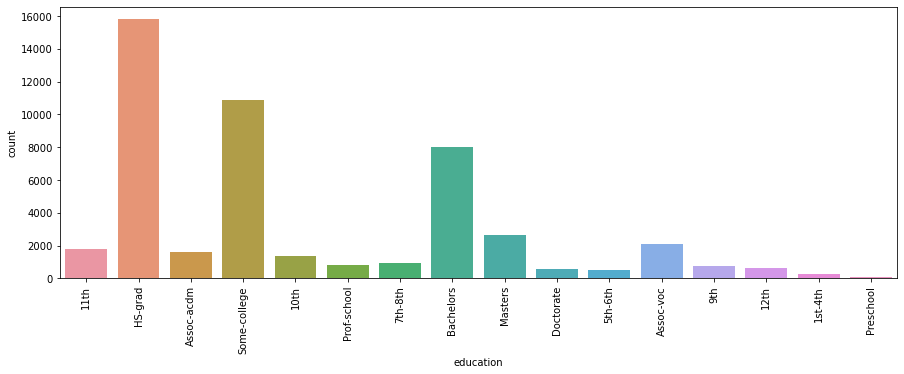

In [13]:
# Education
plt.figure(figsize=(15,5)),
sns.countplot(data['education']),
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Never-married'),
  Text(1, 0, 'Married-civ-spouse'),
  Text(2, 0, 'Widowed'),
  Text(3, 0, 'Divorced'),
  Text(4, 0, 'Separated'),
  Text(5, 0, 'Married-spouse-absent'),
  Text(6, 0, 'Married-AF-spouse')])

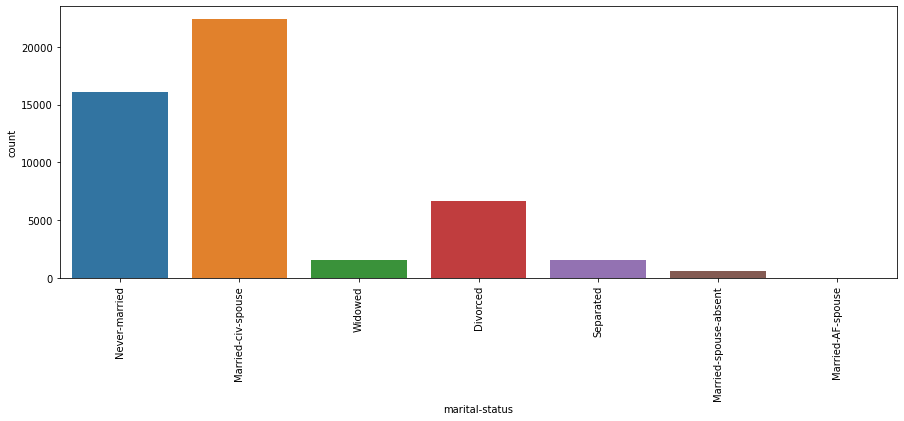

In [14]:
# Marital Status
plt.figure(figsize=(15,5)),
sns.countplot(data['marital-status']),
plt.xticks(rotation=90)

In [15]:
data["occupation"].replace("?","others",inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Machine-op-inspct'),
  Text(1, 0, 'Farming-fishing'),
  Text(2, 0, 'Protective-serv'),
  Text(3, 0, 'others'),
  Text(4, 0, 'Other-service'),
  Text(5, 0, 'Prof-specialty'),
  Text(6, 0, 'Craft-repair'),
  Text(7, 0, 'Adm-clerical'),
  Text(8, 0, 'Exec-managerial'),
  Text(9, 0, 'Tech-support'),
  Text(10, 0, 'Sales'),
  Text(11, 0, 'Priv-house-serv'),
  Text(12, 0, 'Transport-moving'),
  Text(13, 0, 'Handlers-cleaners'),
  Text(14, 0, 'Armed-Forces')])

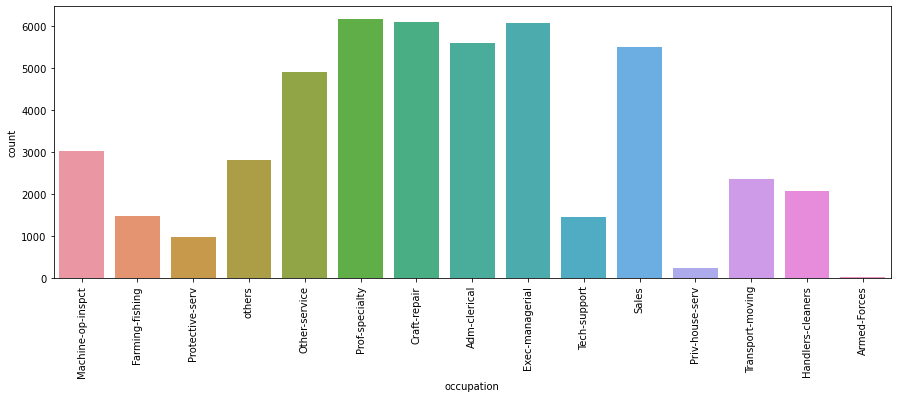

In [16]:
#occupation
plt.figure(figsize=(15,5)),
sns.countplot(data['occupation']),
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Own-child'),
  Text(1, 0, 'Husband'),
  Text(2, 0, 'Not-in-family'),
  Text(3, 0, 'Unmarried'),
  Text(4, 0, 'Wife'),
  Text(5, 0, 'Other-relative')])

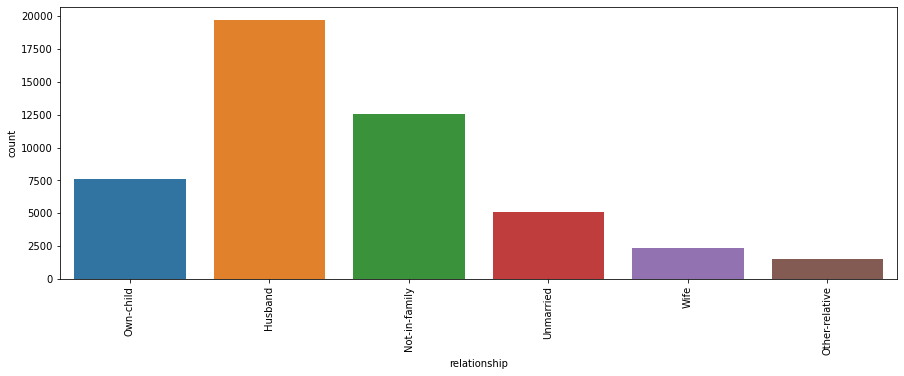

In [17]:
# relationship
plt.figure(figsize=(15,5)),
sns.countplot(data['relationship']),
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'United-States'),
  Text(1, 0, '?'),
  Text(2, 0, 'Peru'),
  Text(3, 0, 'Guatemala'),
  Text(4, 0, 'Mexico'),
  Text(5, 0, 'Dominican-Republic'),
  Text(6, 0, 'Ireland'),
  Text(7, 0, 'Germany'),
  Text(8, 0, 'Philippines'),
  Text(9, 0, 'Thailand'),
  Text(10, 0, 'Haiti'),
  Text(11, 0, 'El-Salvador'),
  Text(12, 0, 'Puerto-Rico'),
  Text(13, 0, 'Vietnam'),
  Text(14, 0, 'South'),
  Text(15, 0, 'Columbia'),
  Text(16, 0, 'Japan'),
  Text(17, 0, 'India'),
  Text(18, 0, 'Cambodia'),
  Text(19, 0, 'Poland'),
  Text(20, 0, 'Laos'),
  Text(21, 0, 'England'),
  Text(22, 0, 'Cuba'),
  Text(23, 0, 'Taiwan'),
  Text(24, 0, 'Italy'),
  Text(25, 0, 'Canada'),
  Text(26, 0, 'Portugal'),
  Text(27, 0, 'China'),
  Text(28, 0, 'Nicaragua'),
  Text(29, 0, 'Honduras'),
  Text(30, 0, 'Iran'),
  Text

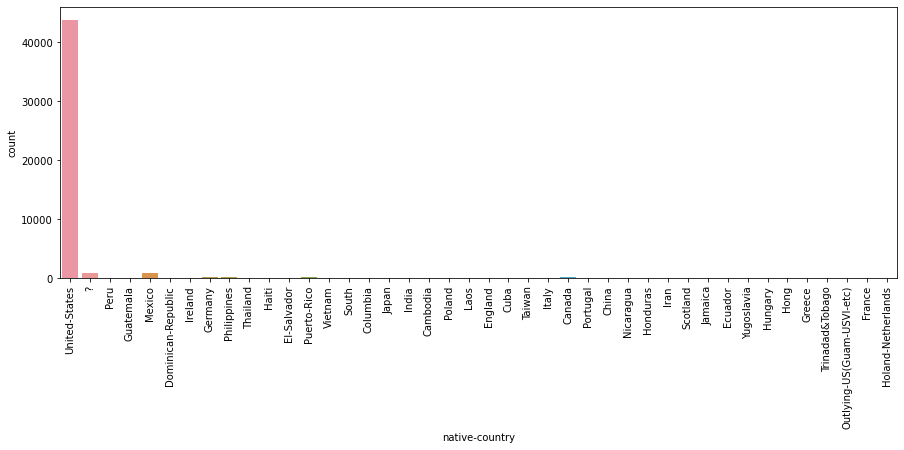

In [18]:
#native-country
plt.figure(figsize=(15,5)),
sns.countplot(data['native-country']),
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Black'),
  Text(1, 0, 'White'),
  Text(2, 0, 'Asian-Pac-Islander'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Amer-Indian-Eskimo')])

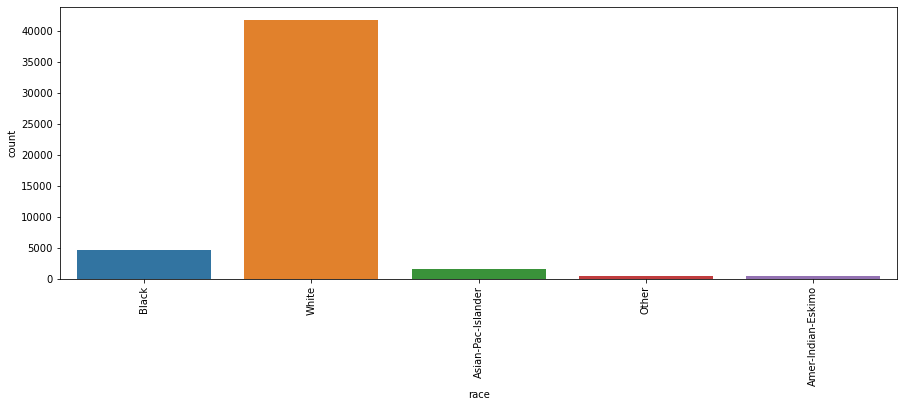

In [19]:
#Race
plt.figure(figsize=(15,5)),
sns.countplot(data['race']),
plt.xticks(rotation=90)

# Checking Correlation

In [20]:
data.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


# Heatmap

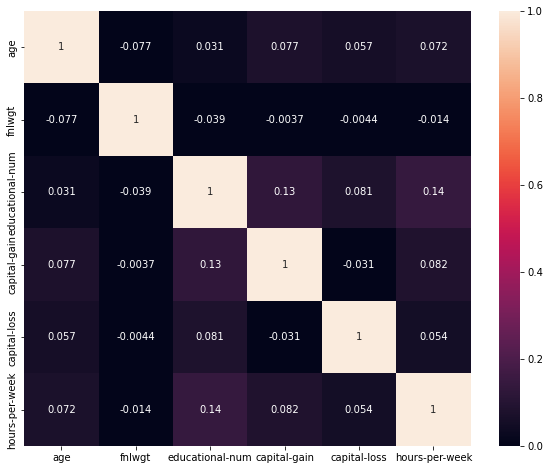

In [21]:
plt.figure(figsize = (10,8))  
sns.heatmap(data.corr(),vmin = 0, vmax = 1, annot=True)
plt.show()

# Bivariate Analysis


<AxesSubplot:xlabel='income', ylabel='age'>

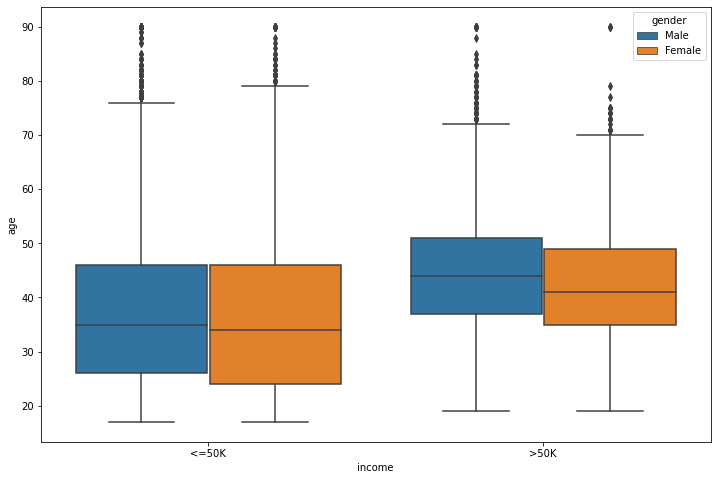

In [22]:
# Income and Age
plt.figure(figsize = (12,8))
sns.boxplot(x = "income", y = "age", data = data, hue = 'gender')

<Figure size 864x504 with 0 Axes>

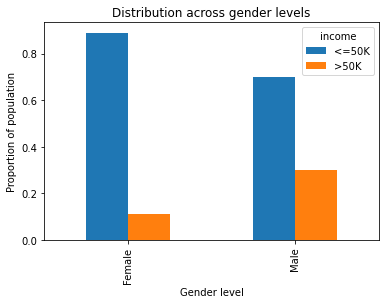

In [23]:
# Income and gender
plt.figure(figsize=(12,7))
gender = round(pd.crosstab(data.gender, data.income).div(pd.crosstab(data.gender, data.income).apply(sum,1),0),2)
gender.sort_values(by = '>50K', inplace = True)
ax = gender.plot(kind ='bar', title = 'Distribution across gender levels')
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')
plt.show()

Text(17.200000000000003, 0.5, 'Proportion of population')

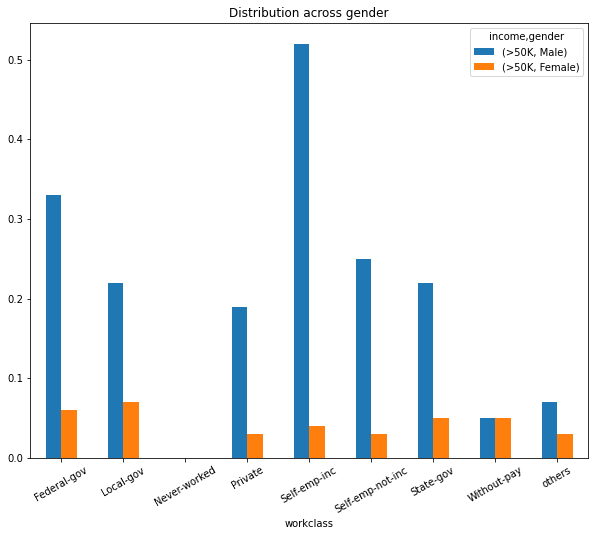

In [24]:
#Income and Workclass
gender_workclass = round(pd.crosstab(data.workclass, [data.income, data.gender]).div(pd.crosstab(data.workclass, [data.income, data.gender]).apply(sum,1),0),2)
gender_workclass[[('>50K','Male'), ('>50K','Female')]].plot(kind = 'bar', title = 'Distribution across gender', figsize = (10,8), rot = 30)
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

# Data Preparation

In [25]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,others,103497,Some-college,10,Never-married,others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [26]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [27]:
data = pd.get_dummies(data,columns = ['workclass','marital-status','occupation',
                                      'relationship','race','gender'], prefix = ['workclass', 'is', 'is', 'race_is', 'relation', 'is'], drop_first=True)

<AxesSubplot:>

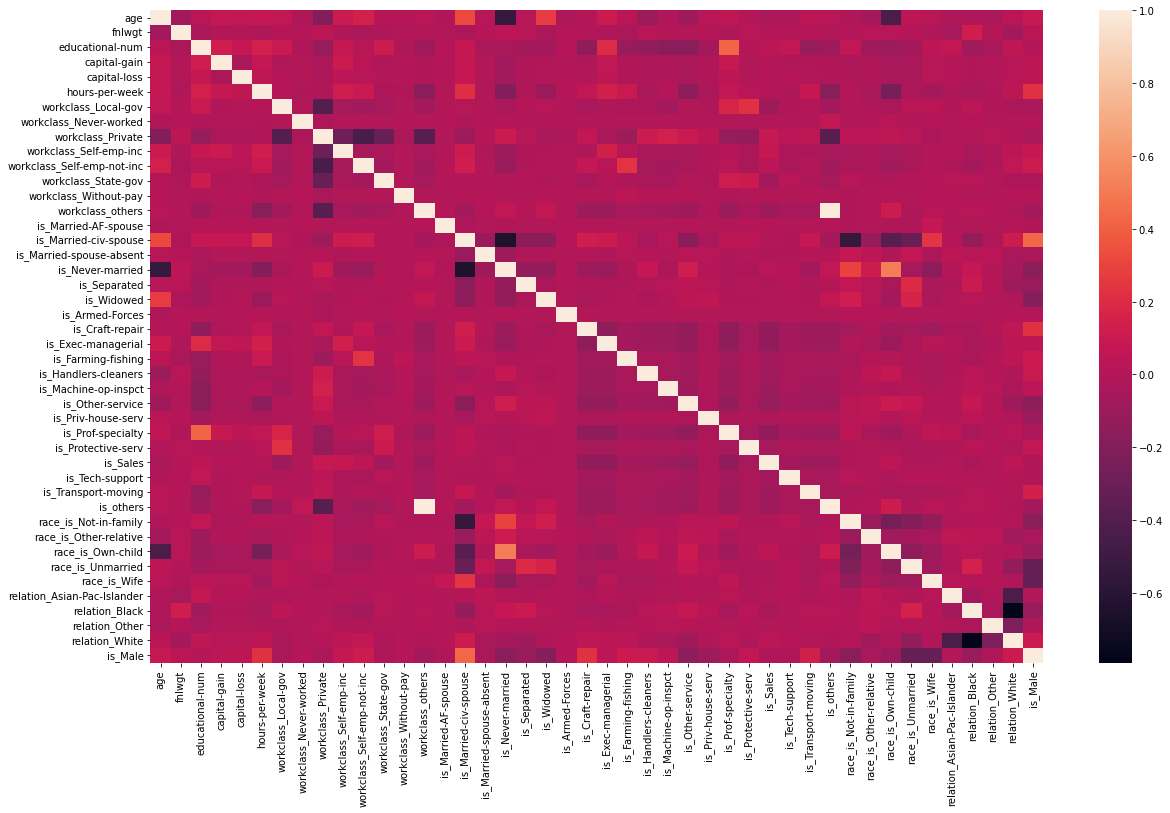

In [28]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr())

# Model Preparation

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics

In [30]:
y = data.income
X = data.drop(['income', 'education', 'native-country', 'fnlwgt'],axis=1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Random Forest

In [32]:
rfmodel = RandomForestClassifier(n_estimators=300,oob_score=True,min_samples_split=5, max_depth=10,random_state=10)
rfmodel.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=300,
                       oob_score=True, random_state=10)

In [33]:
def show_classifier_metrics(clf, y_train=y_train,y_test=y_test, print_classification_report=True, print_confusion_matrix=True):
    print(clf)
    if print_confusion_matrix:
        print('Confusion matrix of training data : ')
        print(metrics.confusion_matrix(y_train, clf.predict(X_train)))
        print('Confusion matrix of test data : ')
        print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
    if print_classification_report:
        print('Classification report of test data : ')
        print(metrics.classification_report(y_test, clf.predict(X_test)))

In [34]:
show_classifier_metrics(rfmodel,y_train)
print('oob score = ', rfmodel.oob_score_)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=300,
                       oob_score=True, random_state=10)
Confusion matrix of training data : 
[[28592  1084]
 [ 4204  5193]]
Confusion matrix of test data : 
[[7175  304]
 [1010 1280]]
Classification report of test data : 
              precision    recall  f1-score   support

       <=50K       0.88      0.96      0.92      7479
        >50K       0.81      0.56      0.66      2290

    accuracy                           0.87      9769
   macro avg       0.84      0.76      0.79      9769
weighted avg       0.86      0.87      0.86      9769

oob score =  0.8601591892099404


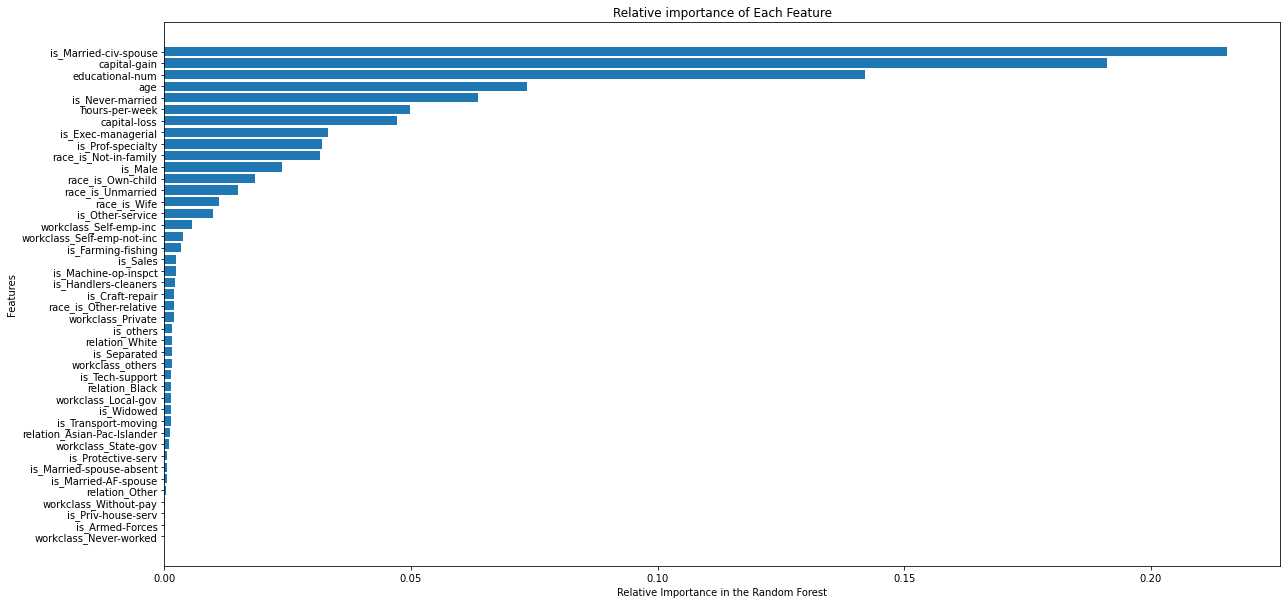

In [35]:
importance_list = rfmodel.feature_importances_
name_list = X_train.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.figure(figsize=(20,10))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

# <center>Thank You</center>